In [1]:
%pylab inline

import math

import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


## Our Toolkit

First, we want a formula that we can use to approxiamate the probability that given a population size and a number of possible values, we have 0 pairs.

Or

<center>$Pr(No Matches) = \frac{(NumValues - 1)}{NumValues}^{\frac{(PopSize)(PopSize-1)}{2}}$</center>


In [2]:
def pr_no_pairs(popSize, numValues):
    prNot = ((numValues-1) / numValues)
    numPairs = ((popSize)*(popSize-1) / 2)
    return prNot ** numPairs

It would also be useful to back into the size of the population needed to achieve a threshold of certainty, given a number of possible values.

For this, we'll use

<center>$n \approx \sqrt{-2ln(1-Pr)} * \sqrt{Values}$</center>


Credit: https://betterexplained.com/articles/understanding-the-birthday-paradox/

In [3]:
def count_needed_given_pr(values, pr=.5):
    count = (sqrt(-2*math.log(1-pr)) * math.sqrt(values))
    return ceil(count)

Finally, we want to generate plots to vizually guide intuition for where these break-even points are.

In [4]:
def make_paradox_plot(x, y, c):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(x, y)
    
    plt.axhline(.5, c='red')
    break50 = count_needed_given_pr(c, pr=.5)
    ax.text(break50*1.1, .525, '{:n}'.format(break50), fontsize=15)
    
    plt.axhline(.10, c='green')
    break10 = count_needed_given_pr(c, pr=.9)
    ax.text(break10*1.1, .125, '{:n}'.format(break10), fontsize=15)

    plt.axhline(.01, c='black')
    break01 = count_needed_given_pr(c, pr=.99)
    ax.text(break01, .03, '{:n}'.format(break01), fontsize=15)    
    
    ax.legend(labels=['Pr(No Matches)', '50%', '90%', '99%'], fontsize=15)
    
    ax.set_title('Probability of No Pairs In {} Possible Values'.format(c)
                 , fontsize=20)
    ax.set_xlabel('People in the Room', fontsize=12)
    ax.axes.get_yaxis().set_visible(False)
    plt.show()

## Birthday Paradox Napkin Math

Assume you talk to your first 2 neighbors

<center>$\frac{364}{365} * \frac{364}{365}$</center>

In [5]:
(364/365)**2

0.9945280540439106

How about 100?

In [6]:
(364/365)**100

0.7600670738159009

How many pairs are there?

<center>$\frac{(PopSize)(PopSize-1)}{2}$</center>

### The Birthday Paradox

Sure enough, substituting 23 into our formula above, we get

<center>$Pr(No Matches) = \frac{364}{365}^{\frac{(23)(22)}{2}}=.4995$</center>

In [7]:
pr_no_pairs(23, 365)

0.4995228459634194

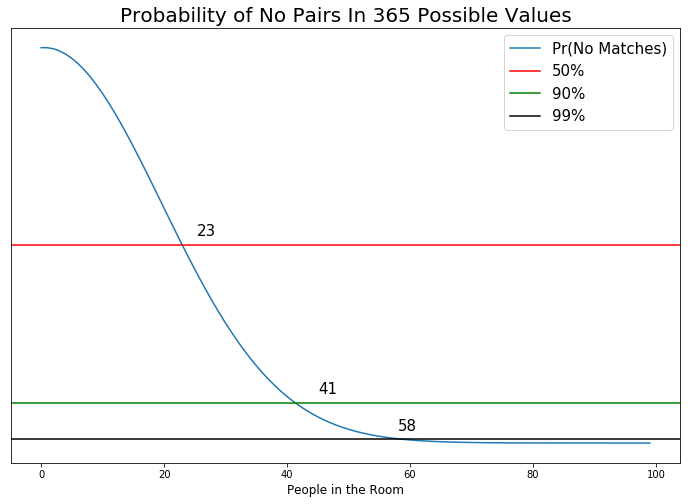

In [8]:
c = 365
x = np.arange(0, 100)
y = [pr_no_pairs(p, c) for p in x]

make_paradox_plot(x, y, c)

### Our DMV Example

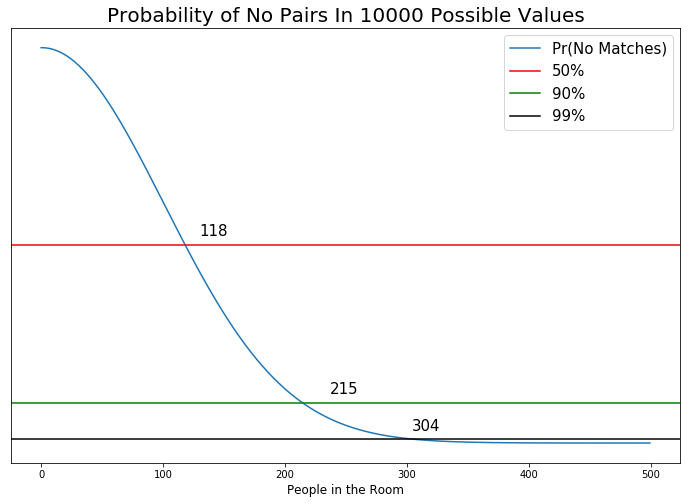

In [9]:
c = 10000
x = np.arange(0, 500)
y = [pr_no_pairs(p, c) for p in x]

make_paradox_plot(x, y, c)

In [10]:
pr_no_pairs(118, 10000)

0.5014083112536466

<center>$Pr(No Matches) = \frac{9999}{10000}^{\frac{(118)(117)}{2}}=.5014$</center>

## Generalize the generalized?

What's the long-tail behavior WRT PopSize and NumValues?

In [22]:
maxPopSize = 300
maxNumValues = 100000

x = np.linspace(300, 600, 300)
y = np.linspace(100000, 200000, 100000)

xx, yy = np.meshgrid(x, y)
zz = np.zeros(xx.shape)

for (i, j), value in np.ndenumerate(xx):
    zz[i][j] = pr_no_pairs(xx[i][j], yy[i][j])

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


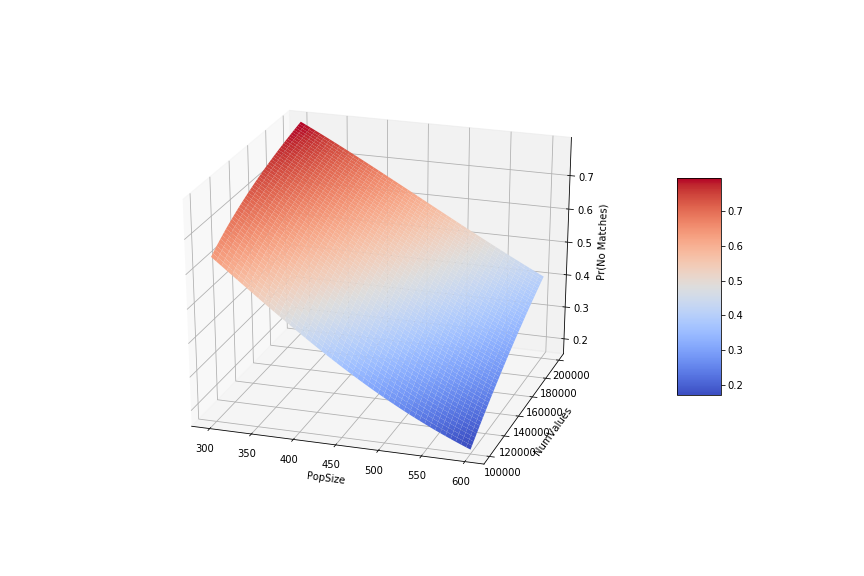

In [23]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, alpha=1)
ax.set_xlabel('PopSize')
ax.set_ylabel('NumValues')
ax.set_zlabel('Pr(No Matches)')
ax.axes.zaxis.set_visible(False)
fig.colorbar(surface, shrink=0.5, aspect=5)

In [24]:
count_needed_given_pr(160000, .50)

471.0

So PopSize holds more weight than NumValues.

Interrogating that a bit more.

In [22]:
x = np.linspace(0, 100000, 100000)
y1 = [count_needed_given_pr(i, .50) for i in x]
y2 = [count_needed_given_pr(i, .90) for i in x]
y3 = [count_needed_given_pr(i, .99) for i in x]

<IPython.core.display.Javascript object>


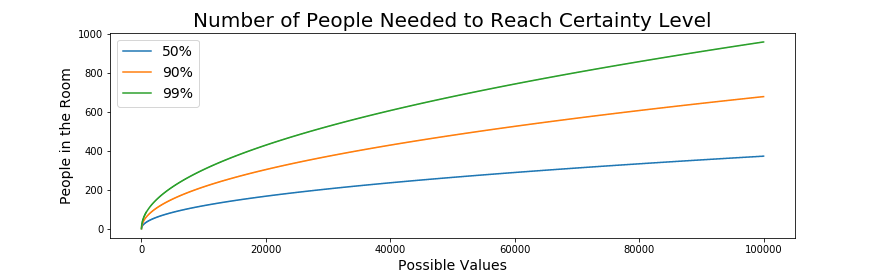

In [23]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.set_ylabel('People in the Room', size=14)
ax.set_xlabel('Possible Values', size=14)
ax.set_title('Number of People Needed to Reach Certainty Level', size=20)

plt.legend(['50%', '90%', '99%'], fontsize=14)

## Extrapolating a bit...

What's the relationship between the number of people needed to achieve 99% accuracy and the number of possible values?

In [24]:
count_needed_given_pr(100000, .99)

960.0

In [11]:
count_needed_given_pr(1000000000, .99)

95971.0

In [26]:
import matplotlib.ticker as ticker

def meta99(val):
    return count_needed_given_pr(val, .99) / val

<IPython.core.display.Javascript object>


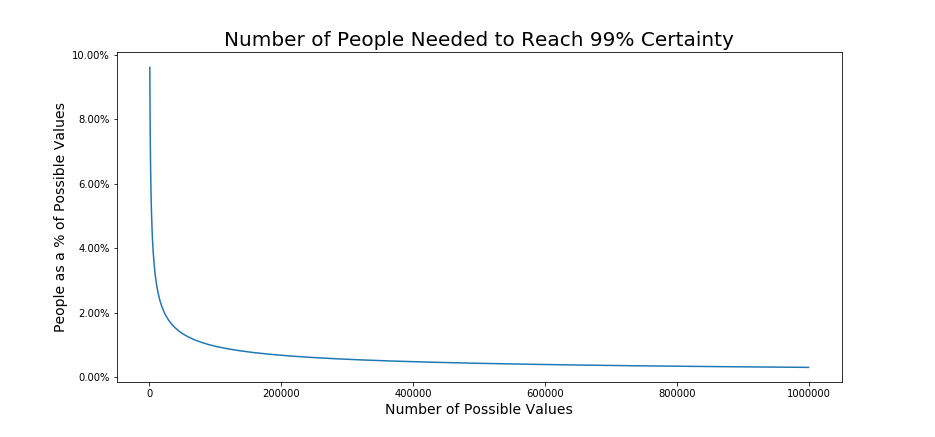

In [27]:
x = np.logspace(3, 6)
y = [meta99(i) for i in x]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.f'))
ax.set_title('Number of People Needed to Reach 99% Certainty', size=20)
ax.set_ylabel('People as a % of Possible Values', size=14)
ax.set_xlabel('Number of Possible Values', size=14)

plt.show()

## Sha1 Napkin Math

In [65]:
count_needed_given_pr((16**40), .5)

1.4234013764919992e+24

In [75]:
count_needed_given_pr((16**40), .5) / float(16**40)

9.7393074365042444e-25

In [33]:
float(16**40)

1.461501637330903e+48

In [31]:
print(hash('a'))
print(hash('b'))

print(len(bin(hash('a'))))
print(bin(hash('b')))

8212160980849335371
-3419480063751824003
65
-0b10111101110100011011110000000000110100011101010010001010000011
